In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import *


In [102]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [103]:
from sklearn.datasets import fetch_california_housing

In [104]:
# Loading data set

housing = fetch_california_housing(as_frame=True)
housing.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [105]:
housing = housing.frame
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


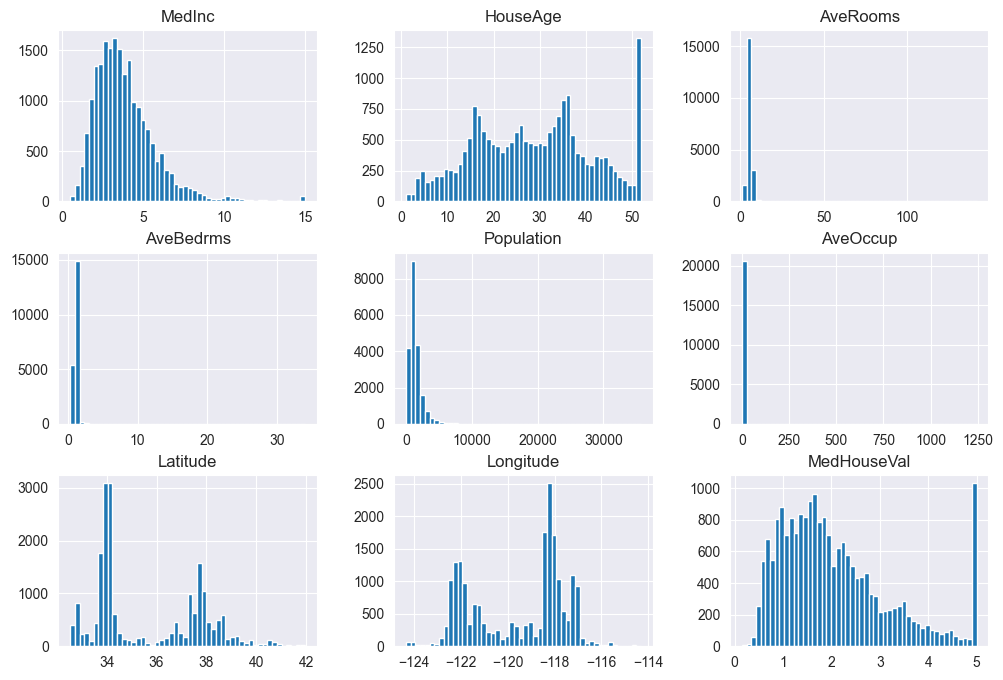

In [106]:
# Visualising the dataset
housing.hist(bins=50, figsize=(12,8))
plt.show()

From the above histograms of the different features, we can conclude that:
1. Features are distributed on very different scales
2. In HouseAge and HouseValue columns the values are capped at 50 and 5 respectively.

For better accuracy, we should preprocess those features. We can either perform feature engineering or clean those problematic instances.



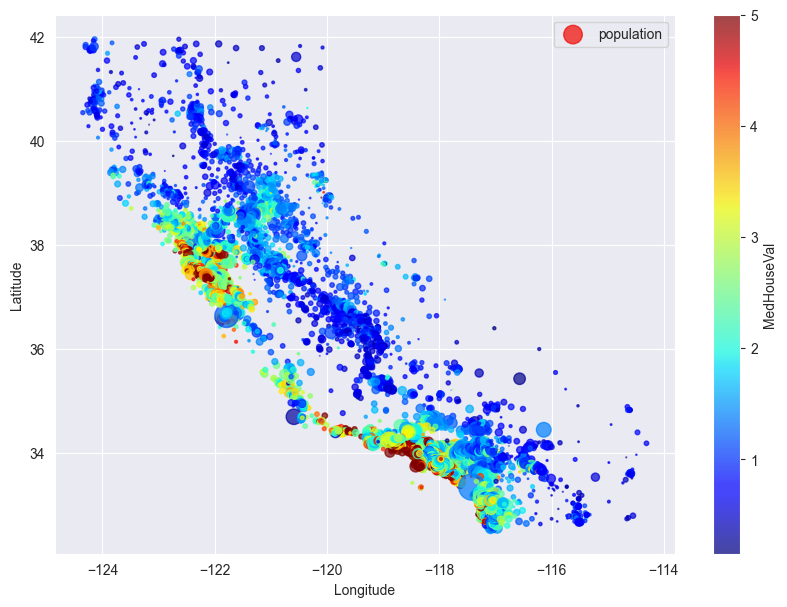

In [107]:
housing.plot(kind="scatter", x="Longitude",y="Latitude", c="MedHouseVal", cmap="jet", colorbar=True, legend=True, sharex=False, figsize=(10,7), s=housing['Population']/100, label="population", alpha=0.7)
plt.show()

The above plot displays the map of California, with the color map corresponding to house value and the radius of the circles corresponding to the population of the areas. Based on this plot, we can conclude that:
1. Houses near ocean value more.
2. House in high population density area also value more but the effect decreases as we move further away from the ocean.
3. And there are some outliers

In [108]:
housing = sklearn.datasets.fetch_california_housing()

In [109]:
housing.target


array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [110]:

print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [111]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [112]:
# Preparing the dataset

dataset = pd.DataFrame(housing.data, columns=housing.feature_names)
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [113]:
dataset['Price']=housing.target


In [114]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [115]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [116]:
# Summarise the stats
dataset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [117]:
## Check the missing values
dataset.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [118]:
# Exploratory Data analysis
# Correlation
# tells the pearson correlation of attributes -1 to 1. more towards 1 means more correlated
corr = dataset.corr()
corr['Price'].sort_values(ascending=True)

Latitude     -0.144160
AveBedrms    -0.046701
Longitude    -0.045967
Population   -0.024650
AveOccup     -0.023737
HouseAge      0.105623
AveRooms      0.151948
MedInc        0.688075
Price         1.000000
Name: Price, dtype: float64

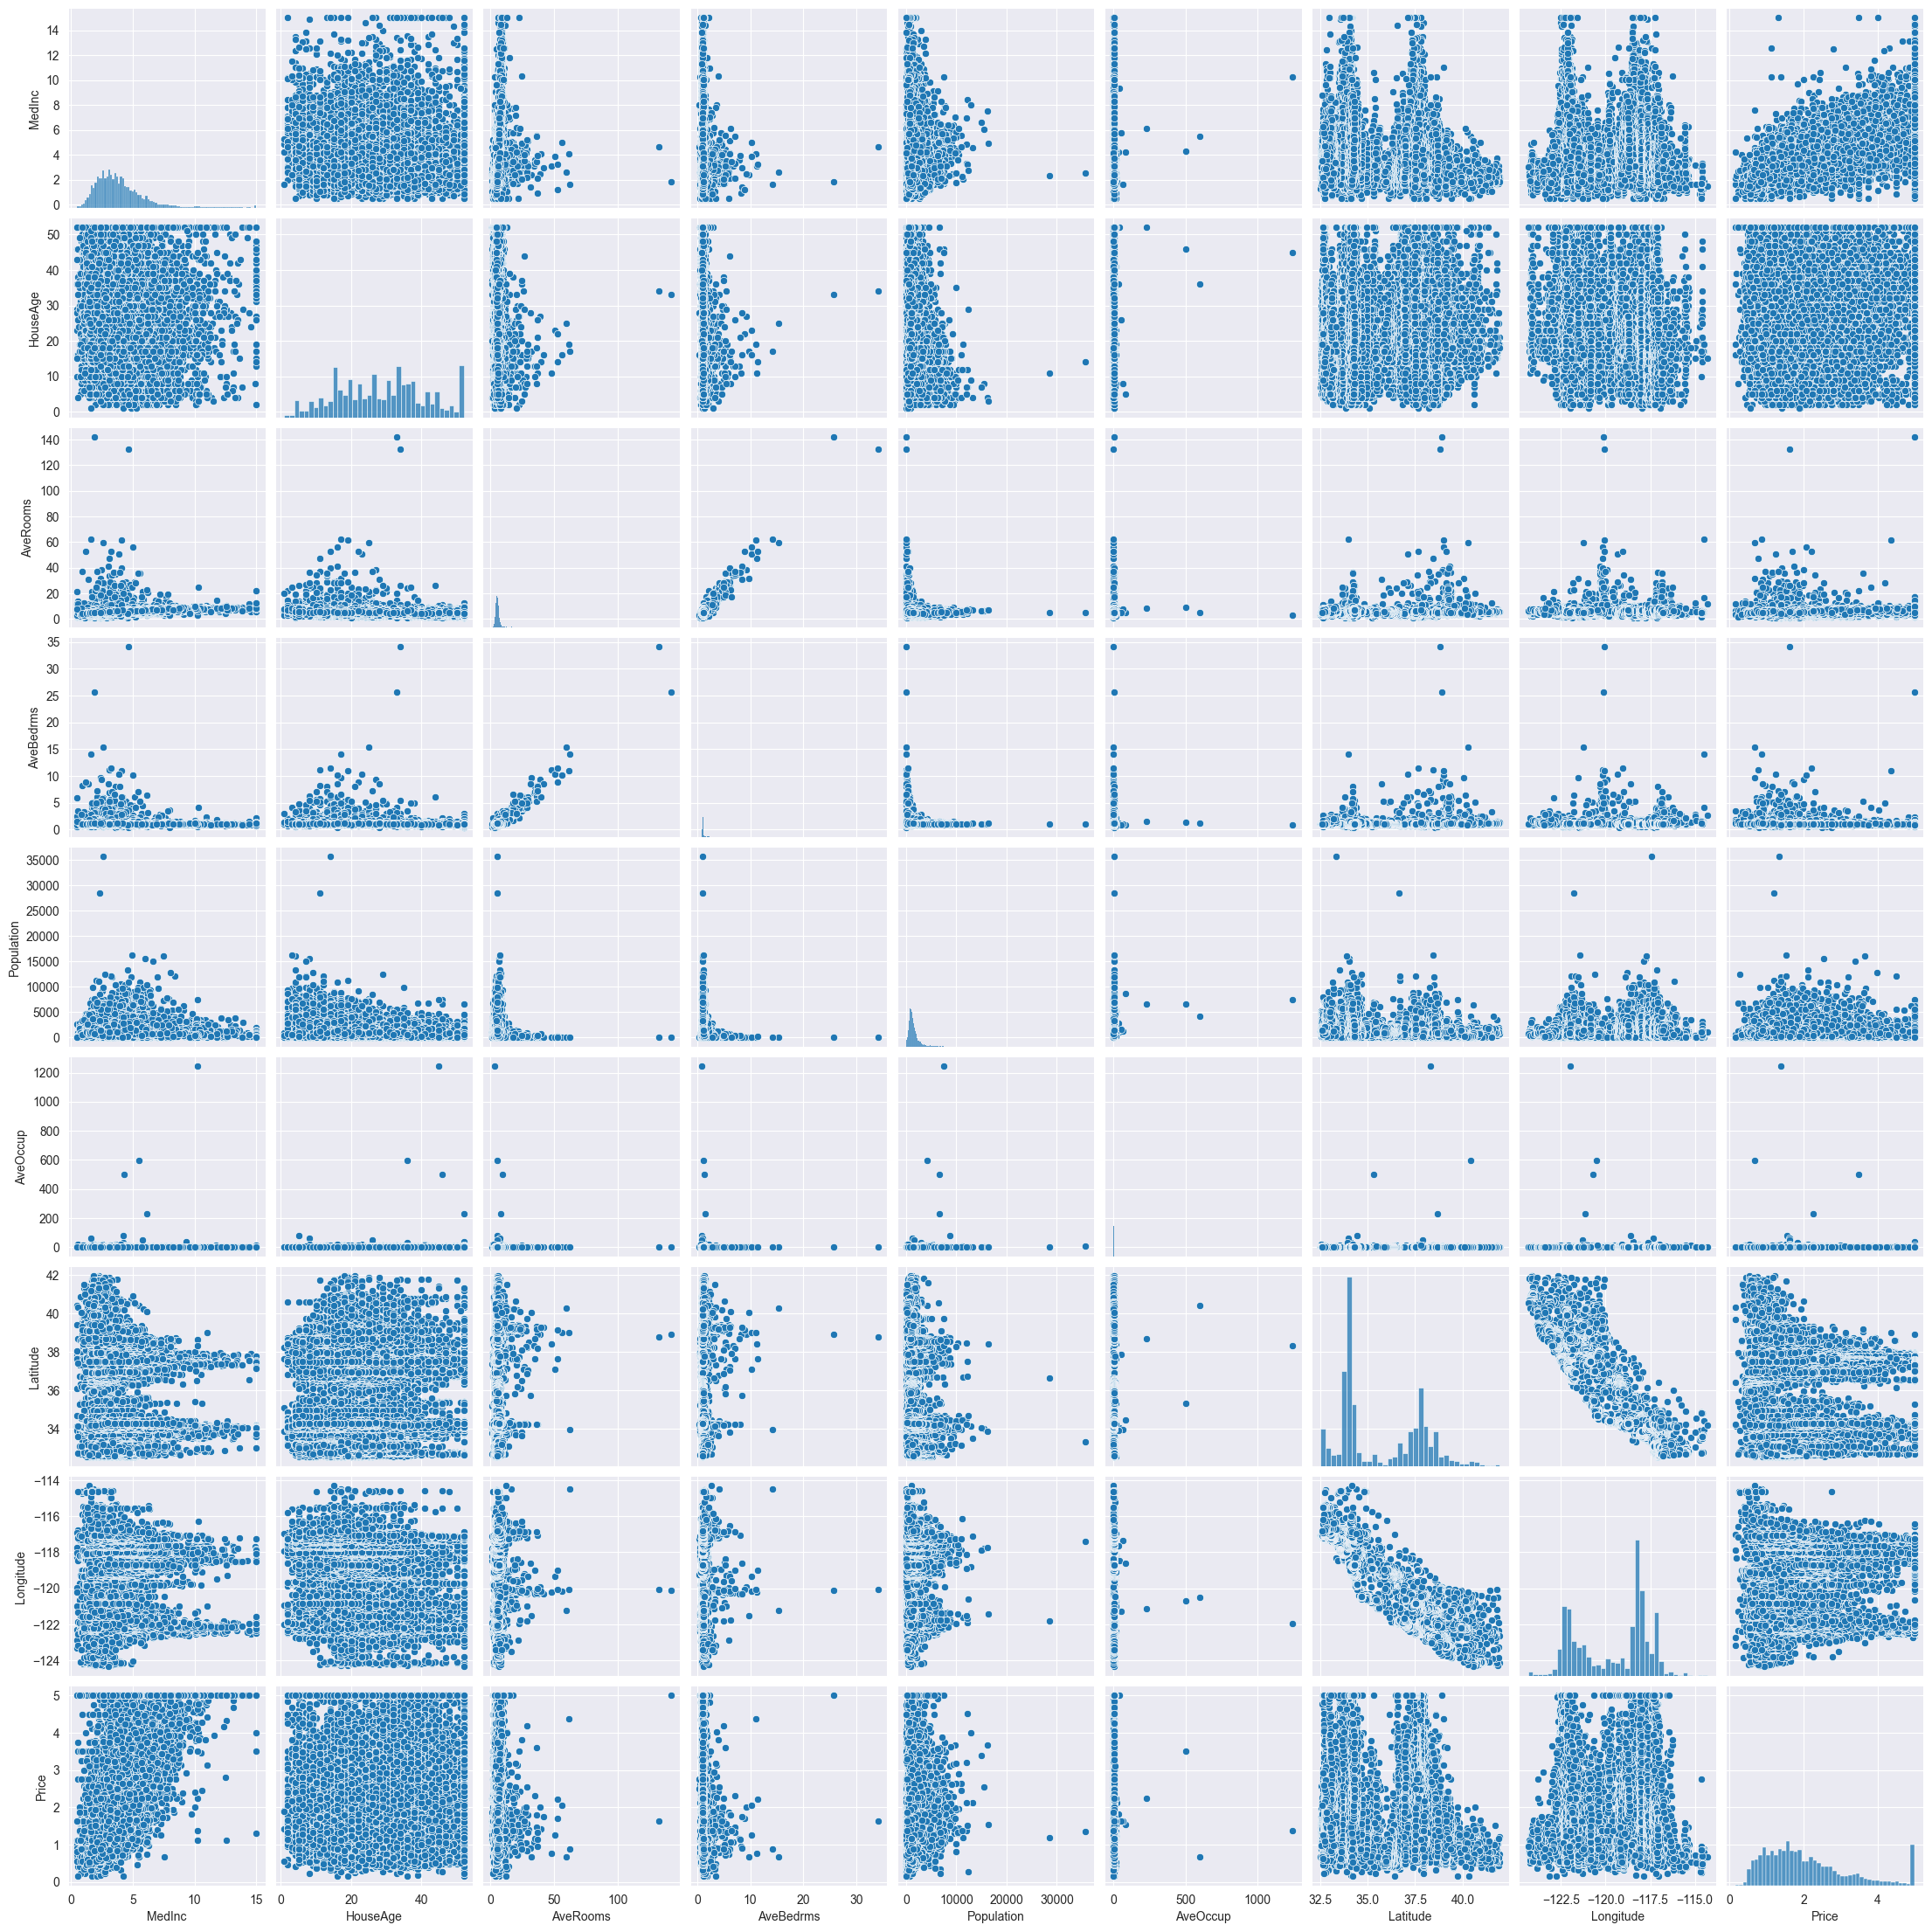

In [119]:
## Comparing attributes to add or not for regression
import seaborn as sns
sns.pairplot(dataset)


Text(0, 0.5, 'Price')

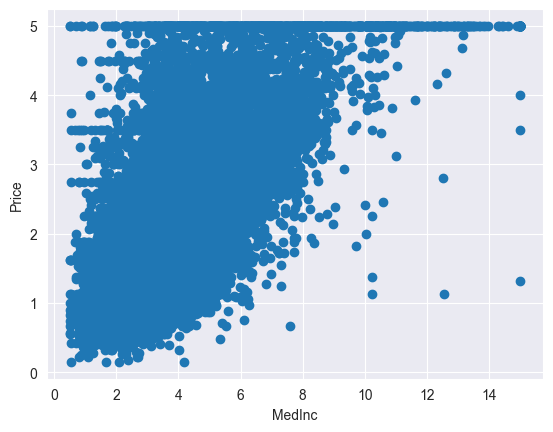

In [120]:
plt.scatter(dataset['MedInc'],dataset['Price'])
plt.xlabel("MedInc")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

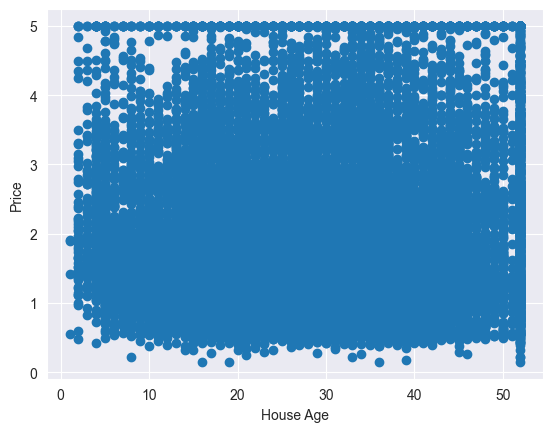

In [121]:
plt.scatter(dataset['HouseAge'],dataset['Price'])
plt.xlabel("House Age")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

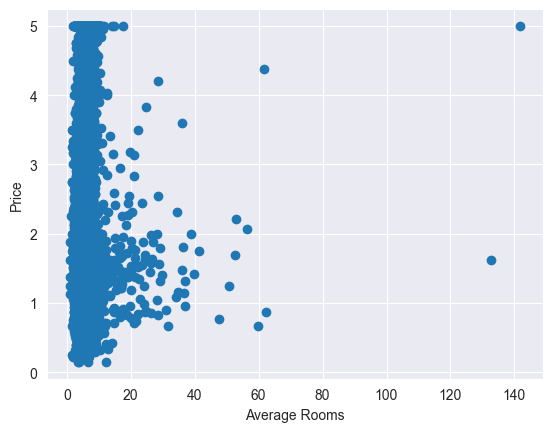

In [122]:
plt.scatter(dataset['AveRooms'],dataset['Price'])
plt.xlabel("Average Rooms")
plt.ylabel("Price")

<Axes: xlabel='MedInc', ylabel='Price'>

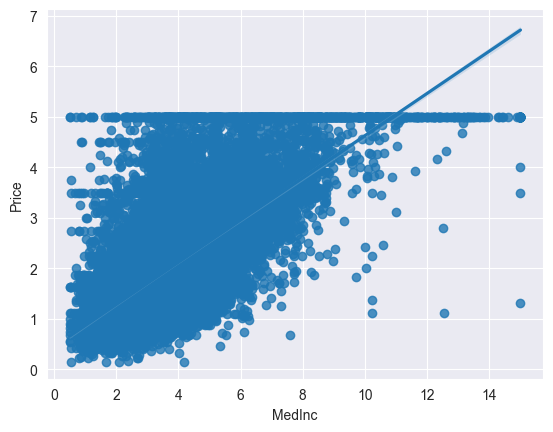

In [123]:
sns.regplot(x="MedInc", y="Price", data= dataset)


<Axes: xlabel='HouseAge', ylabel='Price'>

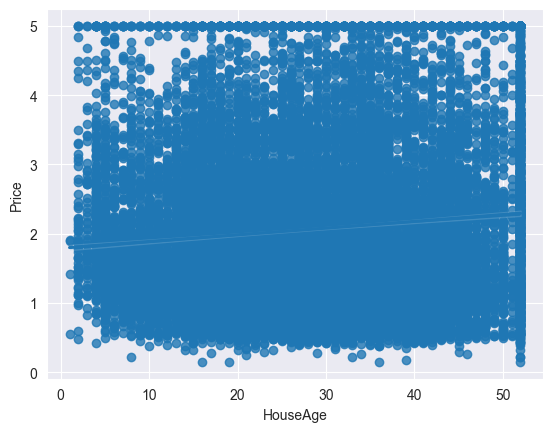

In [124]:
sns.regplot(x="HouseAge", y="Price", data= dataset)

In [125]:
X=dataset.iloc[:,0:2]
Y=dataset.iloc[:,-1]
X.head()


,MedInc,HouseAge
0,8.3252,41.0
1,8.3014,21.0
2,7.2574,52.0
3,5.6431,52.0
4,3.8462,52.0


In [126]:
Y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: Price, dtype: float64

In [127]:
## Train and Test Split 
# Keeping separate Test and train data will keep datasets for future learnings
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=40)

In [128]:
X_test

,MedInc,HouseAge
6607,3.5164,47.0
884,4.6349,31.0
9457,1.5278,19.0
18681,2.1719,17.0
4654,3.3750,48.0
...,...,...
3606,4.5484,29.0
11607,5.3200,16.0
12610,3.9792,34.0
8561,4.1818,22.0


In [129]:
Y_test

6607     2.265
884      1.962
9457     1.458
18681    4.200
4654     2.578
         ...  
3606     2.399
11607    2.195
12610    1.648
8561     3.397
203      1.194
Name: Price, Length: 6192, dtype: float64

In [130]:
# Standard scalar: We use SC to work-out the gradient descent for the regression
# Also for global minima we need to make standard scaling the inputs
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [131]:
X_train= scaler.fit_transform(X_train)

In [132]:
# We not need to make fit here. 
X_test = scaler.transform(X_test)

In [133]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

In [134]:
# Training the Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)


LinearRegression()

In [135]:
# print the coefficients
print(model.coef_)
print(model.intercept_)
print(model.get_params())

[0.82241778 0.21420746]
2.059086070044297
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


In [136]:
# prediction of test data
pred_model = model.predict(X_test)

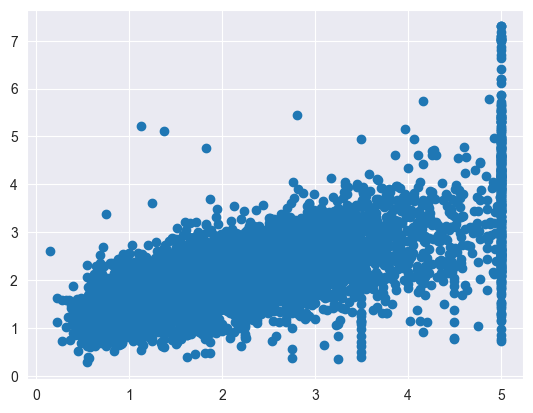

In [137]:
## Ploting the regression prediction values
plt.scatter(Y_test,pred_model)

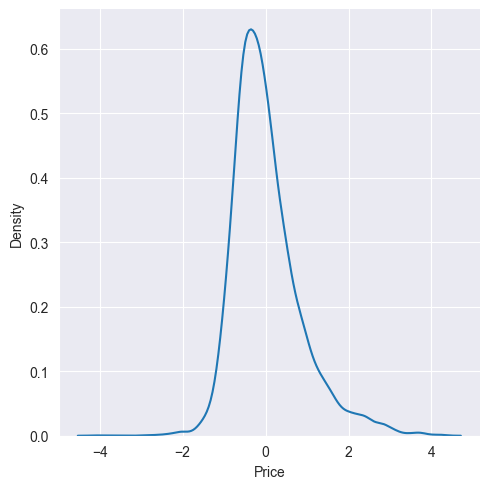

In [138]:
residuals = Y_test-pred_model
sns.displot(residuals, kind="kde")

## Here if the residuals are in a normal distribution format then we can say out model is working OKay.

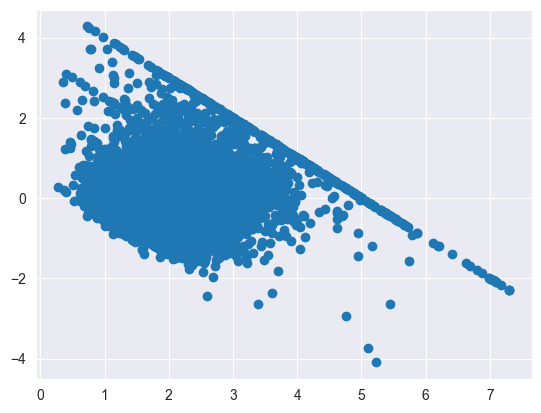

In [139]:
plt.scatter(pred_model,residuals)
## Again Uniform distribution is essential  

In [140]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(mean_absolute_error(Y_test, pred_model))
print(mean_squared_error(Y_test, pred_model))
print(np.sqrt(mean_squared_error(Y_test, pred_model)))

0.6080572353461429
0.6777080488783845
0.8232302526501225


In [141]:
## R-squared and Adjusted R square
from sklearn.metrics import r2_score
score = r2_score(Y_test, pred_model)
print(score)

0.4980357943200481


Formula
R2adj=1−[(1−R2)(n−1)/n−k−1]
Where −
n = the number of points in your data sample.
k = the number of independent regressors, i.e. the number of variables in your model, excluding the constant.

In [142]:
## Adjusted r-square formula
## Value should be less then R^2 
1-(1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.49787358258772296

In [143]:
X[0:1]

,MedInc,HouseAge
0,8.3252,41.0


In [144]:
# Use of scaler values

z=scaler.transform(X[0:1])

In [145]:
model.predict(z)

array([4.20882136])

## Pickle The Model file for the deployment

In [146]:
import pickle
pickle.dump(model,open('regmodel.pkl','wb'))


In [147]:
pickle_reg_model= pickle.load(open('regmodel.pkl','rb'))

In [148]:
# Prediction with pickle model
pickle_reg_model.predict(z)

array([4.20882136])